In [2]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import h5py

from scipy.optimize import curve_fit

from numpy import exp

/Users/owilkman/.virtualenvs/test/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Define the model

In [14]:
def model(X, a, b, c):
    return a*exp(-c*X) + b*X

## Load the data

In [15]:
with h5py.File("data.hdf5", "r") as inputfile:
    X = np.array(inputfile["xdata"])
    Y = np.array(inputfile["ydata"])
X = np.radians(X)

## Fit the curve

In [17]:
p, err = curve_fit(model, X, Y)
a, b, c = p

print("Best fit a = {:.2f}, b = {:.2f}, c = {:.2f}".format(a, b, c))

Best fit a = 5.09, b = -1.85, c = 3.26


## Plot the data

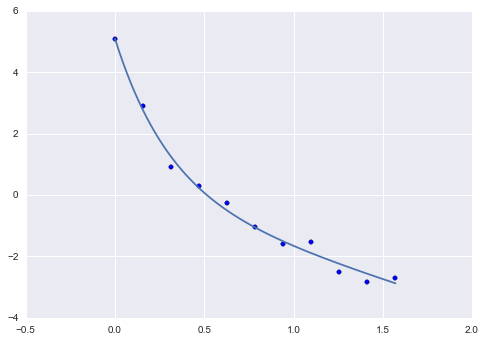

In [19]:
dense_X = np.linspace(X.min(), X.max(), 500)

plt.plot(dense_X, model(dense_X, a, b, c))
plt.scatter(X,Y)